In [65]:
# import and definitions
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
from collections import namedtuple
import numpy as np
from math import sin, cos, sqrt


**该文档未完成**

# 勒让德多项式

## 正交多项式
正交多项式是指一组多项式的集合，他们满足一个特性：
当他和自己求内积是得到的是一个常量
当和这一组多项式的其他成员求内积会得到0


<details>
  <summary>函数内积？</summary>
   待补充 
</details>


这个特性我们称之为 **\"正交性\"**
既：

当m!=n时

$
\int_{-1}^{1} F_{m}(x)*F_{n}(x) = 0 
$

当m==n时

$
\int_{-1}^{1} F_{m}(x)*F_{n}(x) = C
$

用伪代码表示就是
```python
#当FuncM 和 FuncN是同一个函数时 sum = 一个常量，否则 sum = 0
sum = 0
for i = 0 to N
    sum += FuncM(i)*FuncN(i)/N
```


## 勒让德多项式
在各种各种的正交多项式家族中，我们比较关心一组叫做 **“关联勒让德多项式”** (associated legendre polynomials)的多项式家族。
通常表示为$$P_{l}^{m}$$
其中 l 为大于等于0的正整数通常有称为band index，m为0 到 l的正整数,他们和其他正交多项式一样，在\[-1，1\] 区间满足 **正交性**
于是根据 l 可以将这些多项式分成多组

$
P_{0}^{0}(x)\\
P_{1}^{0}(x),P_{1}^{1}(x)\\
P_{2}^{0}(x),P_{2}^{1}(x),P_{2}^{2}(x)\\
等等....
$


以下为关联勒让德多项式**P**的实现:


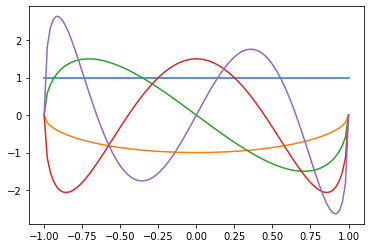

In [66]:
facttable = [math.factorial(x) for x in range(0, 40)]
# for fast factorial calculation


def factorial(x):
    return facttable[x]

# The Legendre polynomials

def P(l, m, x):
    pmm = 1.0

    somx2 = math.sqrt((1.0 - x) * (1.0 + x))
    fact = 1.0
    for i in range(1, m+1):  # (int i=1; i <= m; i++):
        pmm *= (-fact) * somx2
        fact += 2.0

    if (l == m):
        return pmm
    pmmp1 = x * (2.0 * m + 1.0) * pmm
    if (l == m + 1):
        return pmmp1
    pll = 0.0
    for ll in range(m+2, l+1):  # (int ll=m + 2; ll <= l; ++ll):

        pll = ((2.0 * ll - 1.0) * x * pmmp1 - (ll + m - 1.0) * pmm) / (ll - m)
        pmm = pmmp1
        pmmp1 = pll

    return pll

#打印[-1,1]区间的函数图像
XAxis = np.linspace(-1,1,100)

plt.plot(XAxis, [P(0, 0, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(1, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(3, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(4, 1, XAxis[x]) for x in range(0, 100)])



## 验证正交性
前面提到勒让德多项式满足**正交性**，既相同band index下的任意两个勒让德多项式的内积为常熟，不同band index的为0
我们可以用数值方法来求这个积分，也就是在\[-1,1\]均匀采样两个P函数，求乘机的积分

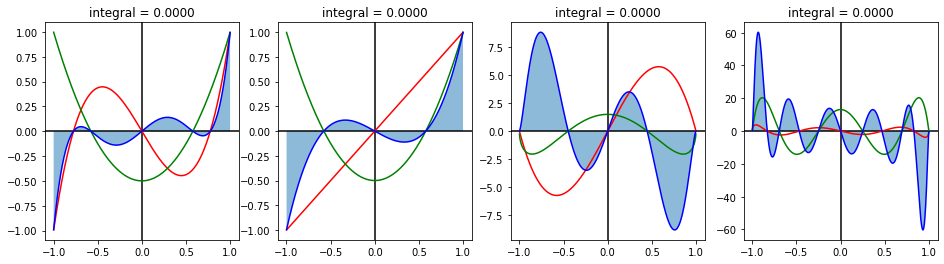

In [67]:
# verity orthogonality of P
def integrateP(l1, m1, l2, m2, fig, row, col, index):
    v1 = []
    v2 = []
    product = []
    XAxis = []
    sum = 0
    N = 1000.0
    for i in range(int(N)):
        x = ((i+0.5)/N-0.5)*2  # map [0,N) to (-1..1)
        XAxis.append(x)
        a = P(l1, m1, x)
        b = P(l2, m2, x)
        v1.append(a)
        v2.append(b)
        product.append(a*b)
        sum += (a*b)/N*2
    fig.add_subplot(row, col, index)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.plot(XAxis,v1,c="red")
    plt.plot(XAxis,v2,c="green")
    plt.fill_between(XAxis, product,  alpha=0.5)
    plt.plot(XAxis, product, c="blue")
    plt.title("integral = %.4f" % sum)


fig = plt.figure(figsize=[16, 4])
integrateP(3, 0, 2, 0, fig, 1, 4, 1)  
integrateP(1, 0, 2, 0, fig, 1, 4, 2)  
integrateP(3, 2, 3, 1, fig, 1, 4, 3)  
integrateP(6, 1, 6, 2, fig, 1, 4, 4)  


# 球谐函数
以上讨论的都是一维函数，将其扩展到二维球面就可以得到我们常说的球谐函数了，通常来说球谐函数包含虚数部分，而这里我们值关心他的实数部分
## 参数化球面
通常球面可以参数化为 $\theta$ , $\phi$,并且可以转换为笛卡尔坐标系下的xyz

$
x = \sin(\theta)\cos(\phi)\\
y = \sin(\theta)\sin(\phi)\\
z = \cos(\theta)\\
$

## 球谐函数
球谐函数通常用符号y表示，定义如下

$
Y_{l}^{m}=\left\{\begin{matrix}
\sqrt{2}K_{l}^{m}\sin(-m\phi)P_{l}^{-m}(\cos(\theta)) &  m>0\\ 
\sqrt{2}K_{l}^{m}\cos(m\phi)P_{l}^{m}(\cos(\theta)) &  m<0\\ 
K_{l}^{0}P_{l}^{0}(\cos(\theta))  & m=0
\end{matrix}\right.
$

图形上只考虑实数形式
$
Y_{l}^{m}=\left\{\begin{matrix}
\sqrt{2}K_{l}^{m}\cos(m\phi)P_{l}^{m}(\cos(\theta)) &  m>0\\ 
\sqrt{2}K_{l}^{m}\sin(|m|\phi)P_{l}^{|m|}(\cos(\theta)) &  m<0\\ 
K_{l}^{0}P_{l}^{0}(\cos(\theta))  & m=0
\end{matrix}\right.
$

其中 **P** 就是之前的勒让德多项式，而**K**只是一个缩放系数

$
K_{l}^{m} = \sqrt(\frac{2l+1}{4\pi} \frac{(l-|m|)!}{(l+|m|)!} )
$





In [68]:

# renormalisation constant for SH function
def K(l, m):
    m = abs(m)
    twol_1 = 2*l+1
    fourPi = 4*math.pi
    fac_l_minus_m = factorial(l-abs(m))
    fac_l_plus_m = factorial(l+abs(m))
    temp = twol_1/fourPi*fac_l_minus_m/fac_l_plus_m
    return math.sqrt(temp)
# spherical harmonic funcion

print(K(0,0))
def SH(l, m, theta, phi):
    sqrt2 = math.sqrt(2.0)
    if m == 0:
        return K(l, 0)*P(l, m, math.cos(phi))
    elif m > 0:
        return sqrt2*K(l, m)*math.cos(m*theta)*P(l, m, math.cos(phi))
    else:
        return sqrt2*K(l, m)*math.sin(abs(m)*theta)*P(l, abs(m), math.cos(phi))



# generate uniform samples

def getSphericalSampleCoords(numSamples):
    goldenRatio = (1 + 5**0.5)/2
    return [(2 *math.pi * i / goldenRatio,math.acos(1 - 2*(i+0.5)/numSamples)) for i in range(numSamples) ]


def sampleSphericalFunction(func,sphericalSampleCoords):
    return [ func(coord[0],coord[1]) for coord in sphericalSampleCoords ]

def plotSphericalSamples(func, sphericalSampleCoords, ax=None, showSphere = False ):

    if ax == None:
        fig,ax = plt.subplots(figsize=[20, 10], subplot_kw=dict(projection="3d"))
        ax.set_xlim3d(-1,1)
        ax.set_ylim3d(-1,1)
        ax.set_zlim3d(-1,1)        
    x = []
    y = []
    z = []
    color = []
    samples = sampleSphericalFunction(func, sphericalSampleCoords)
    for s,coord in zip(samples, sphericalSampleCoords):
        theta = coord[0]
        phi = coord[1]
        xx = math.cos(theta)*math.sin(phi)
        yy = math.sin(theta)*math.sin(phi)
        zz = math.cos(phi)
        v = s
        vv = v
        if showSphere:
            vv = math.copysign(1,v)

        x.append(xx*abs(vv))
        y.append(yy*abs(vv))
        z.append(zz*abs(vv))
        if v > 1 :
            v = 1
        if v < -1:
            v = -1

        if v > 0:
            color.append([v,0 , 0])
        else:
            color.append([0, -v*0.5, 0])
            
    ax.scatter(x, y, z, c=color)
    



0.28209479177387814


Text(0.5, 1.0, '1D Image of P(x) [-1,1]')

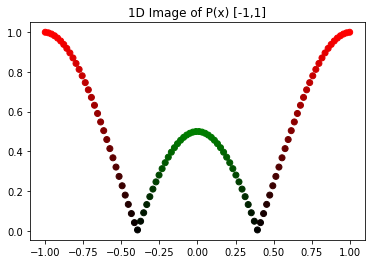

In [69]:
from matplotlib import font_manager
X = [math.cos(((x+0.5)/100.0)*math.pi) for x in range(0, 100)]
Y = [(P(2, 0, X[x])) for x in range(0, 100)]
plt.scatter(XAxis, [abs(Y[x]) for x in range(0, 100)], c=[ [Y[x],0,0] if  Y[x] >0 else [0,-Y[x],0] for x in range(0,100)])
plt.title("1D Image of P(x) [-1,1]")



勒让德函数的一维度图像（这里取了绝对值）所以绿色为负数，红色为正数，颜色越亮表示绝对值越大

下面将这个函数拓展到球面

图1将函数值映射到球面上的某条经线（Phi为固定值），图2将其扩展都整个球面单位球面，图3将函数的绝对值映射为到表面的距离（越小，离球心越近）

Text(0.5, 0.92, 'SH(2,2)')

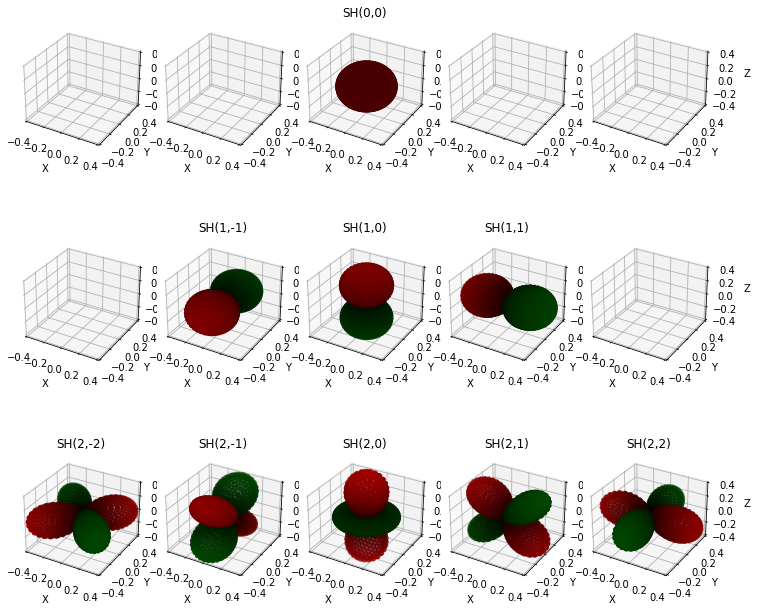

In [70]:

fig,axes = plt.subplots(   nrows = 3, ncols=5, subplot_kw=dict(projection='3d'))
fig.set_size_inches((10,10))
fig.tight_layout()
for row in axes:
    for ax in row:
        ax.grid(True)
        ax.axis(True)
        
        ax.set_xlim3d(-0.4,0.4)
        ax.set_ylim3d(-0.4,0.4)
        ax.set_zlim3d(-0.4,0.4)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        pass
        
#可视化前三阶的球谐函数图像

coords = getSphericalSampleCoords(2000)
plotSphericalSamples(partial(SH,0,0),  coords,  ax=axes[0,2] )
axes[0,2].set_title("SH(0,0)")
plotSphericalSamples(partial(SH, 1, -1),   coords,axes[1,1]  )
axes[1,1].set_title("SH(1,-1)")
plotSphericalSamples(partial(SH, 1, 0),  coords, axes[1,2] )
axes[1,2].set_title("SH(1,0)")
plotSphericalSamples(partial(SH, 1, 1),   coords,axes[1,3] )
axes[1,3].set_title("SH(1,1)")
plotSphericalSamples(partial(SH, 2, -2),  coords, axes[2,0] )
axes[2,0].set_title("SH(2,-2)")
plotSphericalSamples(partial(SH, 2, -1),   coords,axes[2,1] )
axes[2,1].set_title("SH(2,-1)")
plotSphericalSamples(partial(SH, 2, 0),  coords, axes[2,2] )
axes[2,2].set_title("SH(2,0)")
plotSphericalSamples(partial(SH, 2, 1),  coords, axes[2,3] )
axes[2,3].set_title("SH(2,1)")
plotSphericalSamples(partial(SH, 2, 2),  coords, axes[2,4] )
axes[2,4].set_title("SH(2,2)")


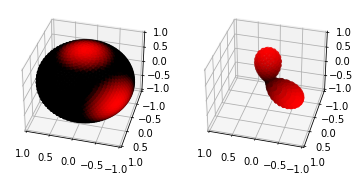

In [71]:
def myFunc(theta, phi):
    return max(0, 5*math.cos(phi)-4) + max(0, -4*math.sin(phi-math.pi)*math.cos(theta-2.5)-3)
# visualize myFunc


fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw=dict(projection="3d",xlim3d=(-1,1),ylim3d=(-1,1),zlim3d=(-1,1)))
axes[0].view_init(35,45+60)
axes[1].view_init(35,45+60)

plotSphericalSamples(myFunc,coords, axes[0],showSphere=True)
plotSphericalSamples(myFunc,coords, axes[1])



In [82]:
# projection
# project into 9 sh basis 

SHbasis = []

for l in range(0, 5):
    for m in range(-l, l+1):
        SHbasis.append(partial(SH,l,m))


N = 5000
coeffs = []
coords = getSphericalSampleCoords(N)
weight = 4*math.pi
oneOverN = 1/N
factor = weight*oneOverN
sourceFuncSamples = sampleSphericalFunction(myFunc,coords)

for basis in SHbasis:
    SHSamples = sampleSphericalFunction(basis,coords)
    coeffs.append(np.dot(SHSamples, np.array(sourceFuncSamples)*factor))


print(["%.6f" % elem for elem in coeffs])


['0.398831', '-0.210524', '0.286515', '0.281854', '-0.315001', '0.000032', '0.131365', '-0.000033', '0.093218', '-0.249614', '0.000035', '0.123389', '0.303880', '-0.165151', '-0.000003', '-0.092202', '-0.100248', '0.000034', '0.133555', '0.000045', '0.343227', '-0.000040', '-0.039472', '0.000030', '-0.154555']


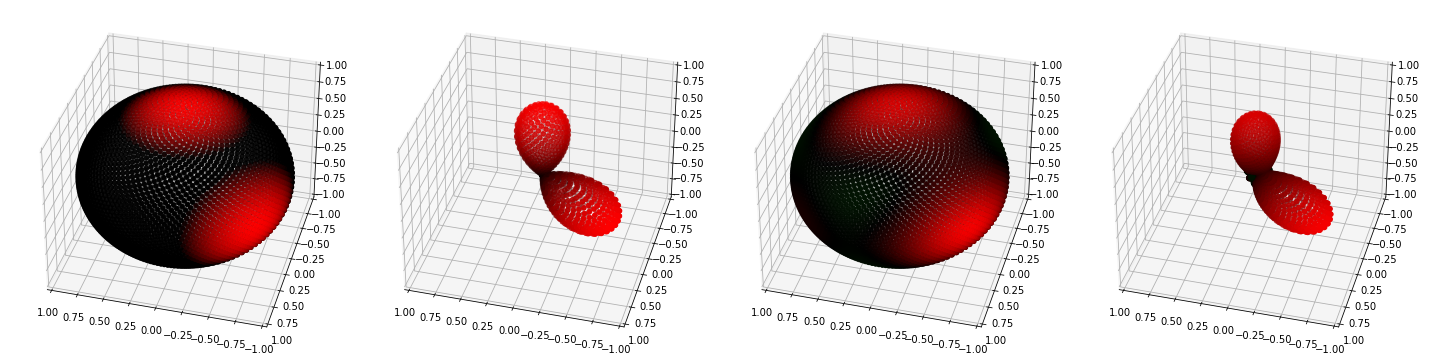

In [83]:
# rebuild
def reconstucted(coeffs, basis, theta,phi):
    result = 0
    for coeff,b in zip(coeffs, basis):
        result += b(theta, phi)*coeff            
    return result


f = partial(reconstucted, coeffs, SHbasis)
# show original function and compare with rebuilt from coeffs
fig,axes = plt.subplots(nrows = 1, ncols = 4,figsize=[20, 10], subplot_kw=dict(projection="3d"))
fig.tight_layout()
for ax in axes:
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-1,1)
    ax.view_init(35,45+60)
        
plotSphericalSamples(myFunc, coords, axes[0], showSphere=True)
plotSphericalSamples(myFunc, coords, axes[1])
plotSphericalSamples(f, coords,axes[2], showSphere=True)
plotSphericalSamples(f, coords,axes[3])


['1.888018', '0.000903', '0.000911', '0.000038', '-0.000320', '-0.000175', '0.003437', '-0.000890', '0.000894', '1.383164', '-0.002070', '0.001037', '0.001299', '0.000765', '-0.000169', '-0.000091', '0.000372', '0.000004', '0.000083', '-0.000243', '0.004584', '0.001077', '0.000792', '0.000179', '0.000846']


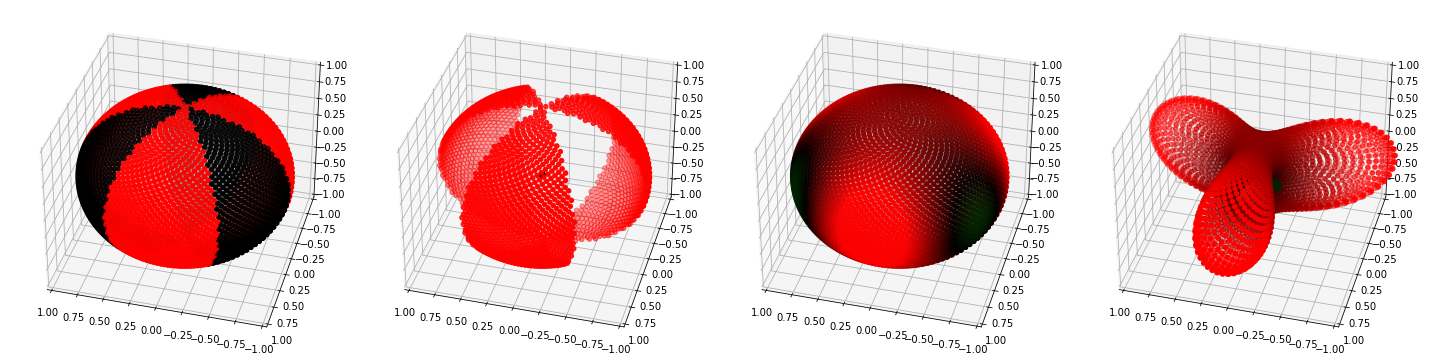

In [84]:
#The Killer one
#first we define a transfer funcion ( which just a occlusion map)
def TransferFunc(theta, phi):
    if ( sin(theta*3) > 0.1 ):
        return 0
    else:
        return 1


sourceFuncSamples = sampleSphericalFunction(TransferFunc, coords)
transferFunc_coeffs = []
for basis in SHbasis:
    SHSamples = sampleSphericalFunction(basis,coords)
    transferFunc_coeffs.append(np.dot(SHSamples, np.array(sourceFuncSamples)*factor))
print(["%.6f" % elem for elem in transferFunc_coeffs])
g = partial(reconstucted, transferFunc_coeffs, SHbasis)
# show original function and compare with rebuilt from coeffs
fig,axes = plt.subplots(nrows = 1, ncols = 4,figsize=[20, 10], subplot_kw=dict(projection="3d"))
fig.tight_layout()
for ax in axes:
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-1,1)
    ax.view_init(35,45+60)
        
plotSphericalSamples(TransferFunc, coords, axes[0], showSphere=True)
plotSphericalSamples(TransferFunc, coords, axes[1])
plotSphericalSamples(g, coords,axes[2], showSphere=True)
plotSphericalSamples(g, coords,axes[3])    

0.44136266841869914
0.4102515722105571
0.4102496872416786


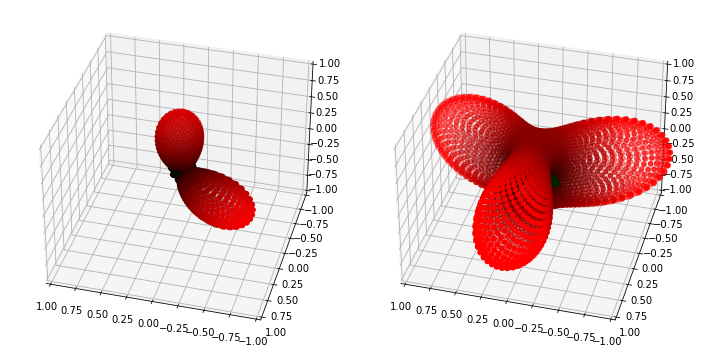

In [85]:
fig,axes = plt.subplots(nrows = 1, ncols = 2,figsize=[10, 5], subplot_kw=dict(projection="3d"))
fig.tight_layout()
for ax in axes:
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-1,1)
    ax.view_init(35,45+60)

plotSphericalSamples(f, coords,axes[0])
plotSphericalSamples(g, coords,axes[1])

print(np.dot(sampleSphericalFunction(myFunc, coords),sampleSphericalFunction(TransferFunc, coords))/N*4*math.pi)
print(np.dot(sampleSphericalFunction(f, coords),sampleSphericalFunction(g, coords))/N*4*math.pi)
print(np.dot(coeffs,transferFunc_coeffs))